# Module 4: Deep Learning

**Introduction**

In this module, we will explore different features of deep learning while trying to build a pipeline for classification of brain tumor MRIs into low-grade and high-grade gliomas. We have simplified the problem for this bootcamp by using only one MRI sequence (T1-post contrast enhanced MRI).

Please note that although this module is written using both Keras/Tensorflow and fast.ai, when it comes to research with our group, you are welcome to use the deep learning framework of your choice. **If you are new to deep learning, we would highly recommend learning [fast.ai](https://https://course.fast.ai/) for your research.** Please choose one framework to become comfortable and functional with.

Dataset:

**Brain Tumor Segmentation Dataset (BRATS)**

## 4.1 Data

Useful Packages/Libraries: **numpy, pandas, scikit-learn, PyTorch, Tensorflow, FastAI**

**Assignment 4.1**

*The goal of this assignment is to explore the data and make sense of the tasks*

*The Brats dataset and the corresponding labels can be accessed [here](https://drive.google.com/drive/folders/1g9RREHNBWuxEoDImKBF4h7_FjwfywX6X?usp=sharing)*

*   **Set up your Google Drive to access the dataset.**
  *  We will use the same shortcut that we developed in Module 1 and navigate to the BRATS sub-folder
  *  The BRATS folder contains two sub-folders - TRAIN and TEST
  *  The TRAIN and TEST folders each contains two subfolders containing our labels. The goal of this assignment is to classify low grade gliomas (LGG) from high grade gliomas (HGG)
    *  Visualize an example HGG and an example LGG.
  *  Count the total number LGG and HGG examples
     * Is there an imbalance?


In [ ]:
# Assignment 4.1

# Importing all the libraries that will be used throughout the course of this assignment
import os
from glob import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Mount Google Drive to your workspace
from google.colab import drive
drive.mount('/content/drive')
# Navigate to the shared folder
# Note: I renamed the shared folder to: Data_UM2ii_Bootcamp
os.chdir('/content/drive/MyDrive/Data_UM2ii_Bootcamp')
# Display the contents in the shared folder
print('This folder contains the following files and sub-folders:',os.listdir())


# Access the BRATS/TRAIN directory
###### Your code goes here ######

# Display an example HGG and an example LGG image and display them using matplotlib
###### Your code goes here ######

# Count the number of training samples for each LGG and HGG
###### Your code goes here ######






## 4.2 Data Loaders

Useful Packages/Libraries: **numpy, pandas, scikit-learn, PyTorch, Tensorflow, FastAI**

**Assignment 4.2**

*The goal of this assignment is to build a data loader to efficiently load data for different tasks.*

**Note: It is impractical to load the entire dataset into memory and we therefore require a dataloader that can dynamically load data into memory, one batch at a time.**

In [ ]:
# Create your training, validation, and test sets
# Consider a 80-20 split.

image_size = (224, 224)
batch_size = 32

# Train set dataloader
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/UM2ii_Research_Management_Workspace/Onboarding_AI_Bootcamp/Data/BRATS/TRAIN",
    validation_split=0.2,
    labels=  'inferred',
    class_names = ['HGG','LGG'],
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    color_mode=  'rgb'
)

# Validation set dataloader
# val_ds = ##### your code goes here ######

# Prefetch the data for better performance
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)


## 4.3 Build, train, and evaluate your deep learning model

* The goal of this assignment is to build a CNN for classification.
  * The model should have 3 convolutional layers with 128, 64 and 32 hidden nodes.
* Summarize your model
* Train your model on train_ds
* Evaluate the results of your model on the validation set (R0)
  * Calculate AUC-PR and AUC-ROC for your model. (Hint: use both metrics when training your model)

In [ ]:
# Assignment 4.3
# Build a CNN model with three hidden convolutional layers
def create_model_CNN(image_shape=(224,224,3)):

  inputs = keras.Input(shape=image_shape)

  x = data_augmentation(inputs)
  # Normalization
  x = layers.Rescaling(1.0 / 255)(x)

  # First Convolutional layer
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPool2D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)

  # Second Convolutional layer
  ##### your code goes here #####

  # Third Convolutional layer
  ##### your code goes here #####

  # Global average pooling
  x = layers.GlobalAveragePooling2D()(x)

  # Fully connected layers
  x = layers.Dense(units=32, activation="relu")(x)

  # Your final layer
  ########### Fill in the XXXXXXXXXXX below
  numUnits = XXXXXXXXXXX
  actFun = XXXXXXXXXXX
  outputs = layers.Dense(units=numUnits, activation=actFun)(x)

  return keras.Model(inputs, outputs)

# Initialize the network
model = create_model_CNN(image_shape=(224,224,3))
# Summarize the network
model.summary()

In [ ]:
# Model training and evaluation
epochs = 10
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-3),
    loss = keras.losses.BinaryCrossentropy(),
    metrics =[tf.keras.metrics.AUC(curve = 'PR'),tf.keras.metrics.AUC(curve = 'ROC')],
)
model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

# Evaluate your model on the validation dataset and print the values or AUC PR and AUC ROC
###### your code goes here #####

## 4.4 Experimenting with different network configurations and hyperparameters

**Assignment 4.4**

**Run all the following experiments with only one epoch**

* Network architecture
  * Modify the network architecture to have 3 new convolutional blocks, each followed by a max pooling and a batch normalization layer.
  * The 3 new CNN blocks should have 128, 64, and 32 nodes respectively.
  * Call the resultant network architecture CNN1
  * Add dropout of 0.25 after each CNN block
  * Evaluate the network and record the results (R1).
  * Add three additional convolutional layer blocks and record the results (R2).


* Training parameters
  * We will use the CNN model from **Assignment 4.3** and build from there.
  * Change optimizer to SGD and record your results (R3)
  * Experiment with the Adam optimizer and the following learning rates: 1e-1. Record the results (R4)
    * Create a [learning rate scheduler](https://keras.io/api/optimizers/learning_rate_schedules/) using [exponential decay](https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/). Record your results (R5)

In [ ]:
# Assignment 4.4
# Hint: create a function for model training and evaluation and write a script to complete all 5 evaluations together
###### your code goes here #####

## 4.5 Data augmentation

**Assignment 4.5**

* Data augmentation is a useful technique for building robust deep network models.
* The idea here is to manipulate and transform original images to augment the training dataset and increase diversity of your training dataset.
* In tensorflow-keras, you can add data augmentation layers to your network
* Use the network from **Assignment 4.3** and add augmentation layer to the network.
```python
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)
```
 * Visualize augmented images

``` python
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
```
* Add the augmentation layer to your network model architecture. Train and evaluate the new model (Use 10 epochs).


In [ ]:
# Assignment 4.5


# Create a data augmentation layer block
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.1),
        # Add random scaling, flip, contrast, and brightness
        ###### your code goes here #####
    ]
)
# Visualize augmented images
# Write a code to visualize your augmented images.
###### your code goes here #####

# Build, train, and evaluate your network
###### your code goes here #####

## 4.6 Transfer learning

**Assignment 4.6**

* Transfer learning is useful for building robust deep network models when you don't have enough training data.
* The idea here is to use a pre-trained network, trained on a large (different) dataset and then fine-tune it for your task.
* In tensorflow-keras, you can use different types of pre-trained models as your baseline and build networks on top of that.
* We have added a starter code using efficient net as a base model. Use this starter code and experiment with **resnet50** and **densnet121** as your base models.
* Toggle trainable between True and False and record your observations
* Toggle learning rate between 1e-3 and 1e-5 and record your observations

Useful link: https://www.tensorflow.org/api_docs/python/tf/keras/applications


In [ ]:
# Assignment 4.6

# Transfer learning
def create_model_transfer_learning(image_shape=(224,224,3)):

  # Change the following line of code across experiments
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet'
                                               )

  # Change the following line of code across experiments
  base_model.trainable=False
  inputs = tf.keras.Input(shape=image_shape)
  x = data_augmentation(inputs)
  x = layers.Rescaling(1.0 / 255)(x)
  x = base_model(x)

  # First Convolutional layer
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPool2D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.GlobalAveragePooling2D()(x)
  #x = Flatten()(x)
  x = layers.Dense(units=256, activation="relu")(x)
  #x = Dense(units=128, activation="relu")(x)
  outputs = layers.Dense(units=1, activation="sigmoid")(x)
  model = keras.Model(inputs, outputs)
  return model

model = create_model_transfer_learning(image_shape = (224,224,3))
model.summary()

# Add your training and evaluation script here.
###### your code goes here #######

## 4.7 Tackling Imbalance

**Assignment 4.7**

* Our training data is highly imbalanced and this could cause our algorithm to get biased agains the underrepresented class.
* There are different ways to tackle data imbalance. In this assignment, you will implement differential class weights for different groups and see if that helps.
* We will try to improve the network from Assignment 4.5 and improve its performance by balancing the data.
* Use the following code snippet as an argument to fit method. Change the ratios to improve your results
``` python
class_weight={0:0.5,1:0.5}
```


Useful link: https://keras.io/api/models/model_training_apis/#fit-method

In [ ]:
# Asssigment 4.7
###### your code goes here #######

## 4.8 Visualizing what the network "sees" to make decisions

**Assignment 4.8**

* Grad-CAM is a useful technique for visualization of what the network is "seeing" the image when making its decision.
* Use model.summary() to get the name of last convolutional layer
* Iterate through the validation dataset and display grad-cam heatmaps for a randomly selected subset of 9 images.
* The function to display has been provided below.

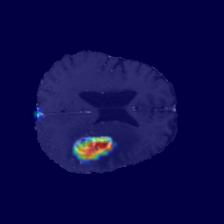

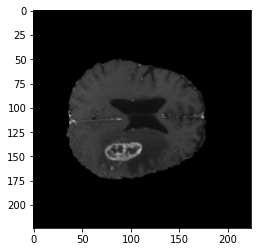

In [ ]:
# GRAD-CAM
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img, heatmap, alpha=0.4):
    # Load the original image


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    cam_path = 'vis.jpg'
    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


########### Make changes here ############
###### Once you get the following code to work.
###### Modify the code to visualize activations of each model you trained for an image

last_conv_layer_name = "name-of-the-last-layer" # Change this
for images, labels in val_ds.take(1):
    for i in range(1):
        #im1 = np.moveaxis(images[i], -1, 0)
        im1 = np.expand_dims(images[i], axis=0)
        heatmap = make_gradcam_heatmap(im1, model, last_conv_layer_name)
        display_gradcam(images[i],heatmap,alpha=0.8)
        # Display heatmap
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.show()
